In [1]:
import pandas as pd

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
#2列目以降のデータをXに、１列目のデータをyに格納
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
#トレーニングデータとテストデータに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
#平均と標準偏差を用いて標準化
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
import numpy as np

In [13]:
#共分散行列を作成
cov_mat = np.cov(X_train_std.T)
#固有値と固有ベクトルを計算
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print("\nEigenvalues \n%s"%eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


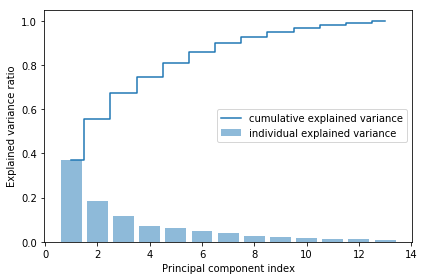

In [15]:
#固有値を合計
tot = sum(eigen_vals)
#分散説明率を計算
var_exp =[(i/tot) for i in sorted(eigen_vals,reverse=True)]
#分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
#分散説明率の棒グラフを作成
plt.bar(range(1,14),var_exp,alpha=0.5,align="center",label="individual explained variance")
#分散説明率の累積和の階段グラフを作成
plt.step(range(1,14),cum_var_exp,where="mid",label="cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [16]:
#(固有値、固有ベクトル)のタプルのリストを作成
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
#上記で作成したものを固有値の大きいものから順に並び替え
eigen_pairs.sort(key=lambda k:k[0],reverse=True )

In [17]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print("Matrix W:\n",w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [18]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [19]:
X_train_pca = X_train_std.dot(w)

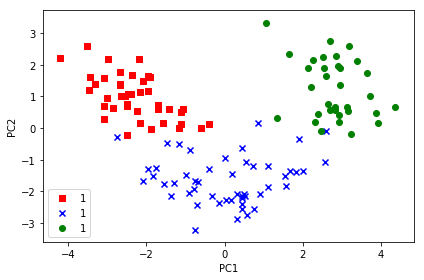

In [22]:
colors =["r","b","g"]
markers=["s","x","o"]
#「クラスラベル」「点の色」「点の種類」の組み合わせからなるリストを生成してプロット
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=1,marker=m)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [25]:
print(X_train)

[[1.362e+01 4.950e+00 2.350e+00 ... 9.100e-01 2.050e+00 5.500e+02]
 [1.376e+01 1.530e+00 2.700e+00 ... 1.250e+00 3.000e+00 1.235e+03]
 [1.373e+01 1.500e+00 2.700e+00 ... 1.190e+00 2.710e+00 1.285e+03]
 ...
 [1.388e+01 5.040e+00 2.230e+00 ... 5.800e-01 1.330e+00 4.150e+02]
 [1.196e+01 1.090e+00 2.300e+00 ... 9.900e-01 3.130e+00 8.860e+02]
 [1.270e+01 3.870e+00 2.400e+00 ... 1.190e+00 3.130e+00 4.630e+02]]


In [24]:
from matplotlib.colors import ListedColormap

In [27]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers =("s","x","o","^","v")
    colors = ("red","blue","lightgreen","gray","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    #グリッドポイントの作成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線プロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor="black",
                    marker = markers[idx],
                    label=cl)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all poi

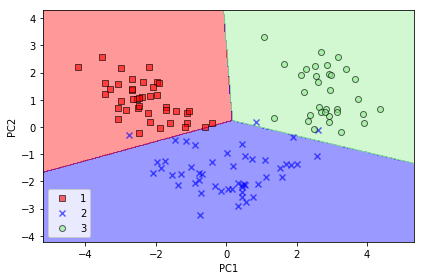

In [29]:
#主成分を指定して、PCAのインスタンスを生成
pca = PCA(n_components=2)
#ロジスティック回帰のインスタンスを生成
lr = LogisticRegression()
#トレーニングデータとテストデータでPCAを実行
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#トレーニングデータでロジスティック回帰を実行
lr.fit(X_train_pca,y_train)
#決定境界をプロット
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


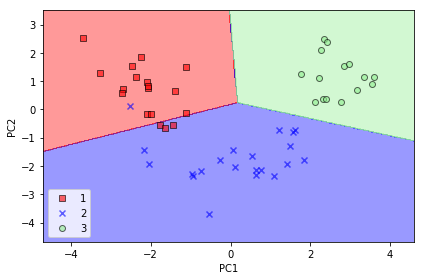

In [30]:
#変換後のテストデータセットに対するロジスティック回帰の決定領域をプロット
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [31]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
#分散説明率を計算
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

５.２

In [32]:
np.set_printoptions(precision=4)

In [36]:
mean_vecs=[]
for label  in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print("MV%s: %s\n"%(label,mean_vecs[label-1]))

MV1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [37]:
d=13 #特徴量の個数
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row,mv = row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print("Within-class scatter matrix: %sx%s"%(S_W.shape[0],S_W.shape[1]))

Within-class scatter matrix: 13x13


In [38]:
print("Class label distribution: %s"%np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [39]:
d=13
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print("Scaled Within-class scatter matrix: %sx%s"%(S_W.shape[0],S_W.shape[1]))

Scaled Within-class scatter matrix: 13x13


In [40]:
mean_overall = np.mean(X_train_std,axis=0)
d=13
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i+1,:].shape[0]
    #列ベクトルを作成
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print("Between-class scatter matrix: %sx%s"%(S_B.shape[0],S_B.shape[1]))

Between-class scatter matrix: 13x13


In [43]:
# inv関数で逆行列、dot関数で行列積、eig関数で固有値を計算
eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i])for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
print("Eigenvalues in descending order:\n")
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.7615221897938
3.389259780547781e-14
2.842170943040401e-14
1.9284611807586422e-14
1.9284611807586422e-14
1.8639179987230033e-14
1.8639179987230033e-14
7.057897559458914e-15
7.057897559458914e-15
6.596592553773414e-15
3.81059209269662e-15
3.3908455462202616e-15


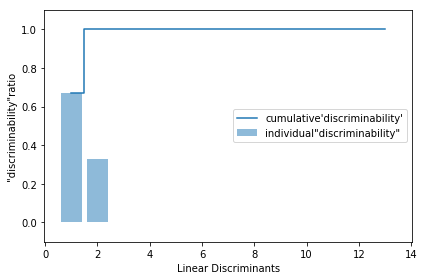

In [45]:
#固有値の実数部の総和を求める
tot = sum(eigen_vals.real)
#分散説明率とその累積和を計算
discr = [(i/tot) for i in sorted(eigen_vals.real,reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14),discr,alpha=0.5,align="center",label='individual"discriminability"')
plt.step(range(1,14),cum_discr,where="mid",label="cumulative'discriminability'")
plt.ylabel('"discriminability"ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [46]:
#最も判別力のある２つの固有ベクトルを列方向に並べて変換行列Wを作成する
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))
print("Matrix W:\n",w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


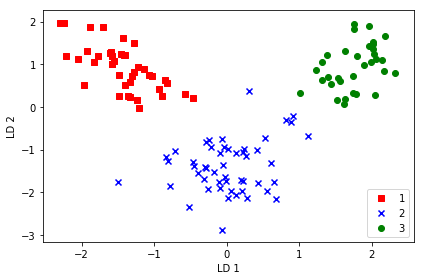

In [47]:
#標準化したトレーニングデータに変換行列をかける
X_train_lda = X_train_std.dot(w)
markers =("s","x","o")
colors = ("r","b","g")
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],
               X_train_lda[y_train==l,1]*(-1),
               c=c,label=l,marker=m)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [49]:
#次元数を指定して、LDAのインスタンスを作成
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train)

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all poi

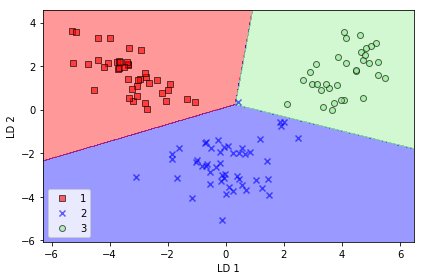

In [50]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


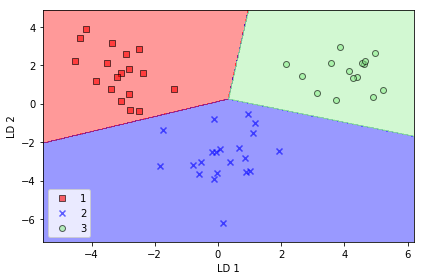

In [51]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

5.3 カーネル主成分分析を使った非線形写像

In [52]:
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh

In [53]:
#RBFカーネルPCAの実装

def rbf_kernel_pca(X,gamma,n_components):
    #N×N次元のデータセットでペアごとのユークリッド距離の２乗を計算
    sq_dists = pdist(X,'sqeuclidean')
    #ペアごとの距離を正方行列に変換
    mat_sq_dists = squareform(sq_dists)
    
    #対称カーネルを計算
    K = exp(-gamma*mat_sq_dists)
    
    #カーネル行列を中心化
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K-one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #中心化されたカーネル行列から固有対を取得
    #scipy.linalg.eighはそれらを昇順で返す
    eigvals,eigvecs = eigh(K)
    eigvals,eigvecs = eigvals[::-1],eigvecs[:,::-1]
    
    #上位k個の固有ベクトル（射影されたサンプル）を収集
    X_pc = np.column_stack((eigvecs[:,i] for i in range(n_components)))
    return X_pc

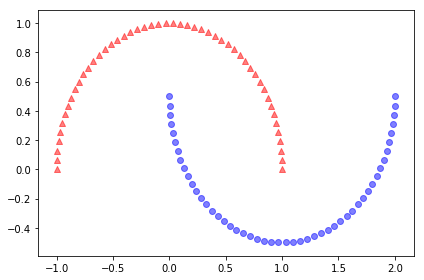

In [59]:
#２つの半月型データを作成してプロット
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],color="red",marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color="blue",marker='o',alpha=0.5)
plt.tight_layout()
plt.show()

In [60]:
#まずは標準のPCAを使って主成分に投影してみる
from sklearn.decomposition import PCA

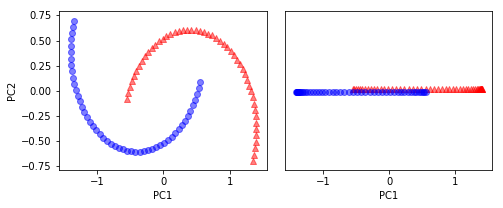

In [64]:
scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)
#グラフの数と配置、サイズを指定
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#１番目のグラフ領域に散布図をプロット
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],
              color="red",marker="^",alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],
              color="blue",marker="o",alpha=0.5)
#2番目のグラフ領域に散布図をプロット
ax[1].scatter(X_pca[y==0,0],np.zeros((50,1))+0.02,
              color="red",marker="^",alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((50,1))-0.02,
              color="blue",marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


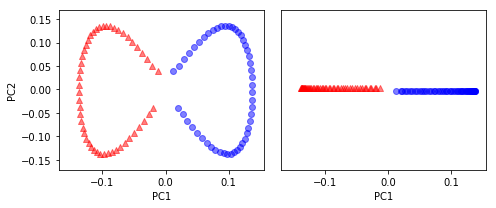

In [66]:
from matplotlib.ticker import FormatStrFormatter
#カーネルPCA関数を実行
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#１番目のグラフ領域に散布図をプロット
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],
              color="red",marker="^",alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],
              color="blue",marker="o",alpha=0.5)
#2番目のグラフ領域に散布図をプロット
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,
              color="red",marker="^",alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,
              color="blue",marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")
plt.tight_layout()
plt.show()

In [67]:
#同心円のデータを作成してプロット
from sklearn.datasets import make_circles

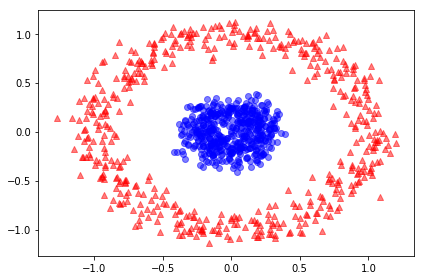

In [68]:
X,y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],color="red",marker="^",alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color="blue",marker="o",alpha=0.5)
plt.tight_layout()
plt.show()

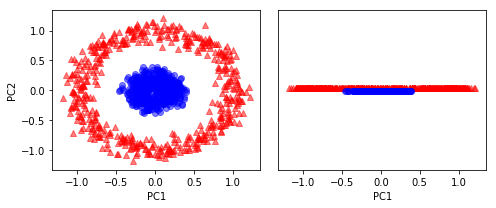

In [71]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
#グラフの数と配置、サイズを指定
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#１番目のグラフ領域に散布図をプロット
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],
              color="red",marker="^",alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],
              color="blue",marker="o",alpha=0.5)
#2番目のグラフ領域に散布図をプロット
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1))+0.02,
              color="red",marker="^",alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1))-0.02,
              color="blue",marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


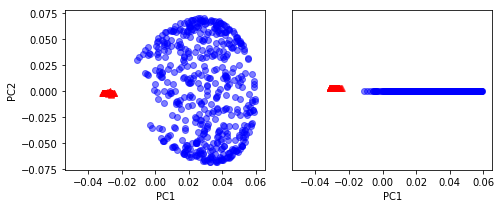

In [72]:
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#１番目のグラフ領域に散布図をプロット
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],
              color="red",marker="^",alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],
              color="blue",marker="o",alpha=0.5)
#2番目のグラフ領域に散布図をプロット
ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1))+0.02,
              color="red",marker="^",alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1))-0.02,
              color="blue",marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")
plt.tight_layout()
plt.show()

In [73]:
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh

In [74]:
def rbf_kernel_pca(X,gamma,n_components):
    #N×N次元のデータセットでペアごとのユークリッド距離の２乗を計算
    sq_dists = pdist(X,'sqeuclidean')
    #ペアごとの距離を正方行列に変換
    mat_sq_dists = squareform(sq_dists)
    
    #対称カーネルを計算
    K = exp(-gamma*mat_sq_dists)
    
    #カーネル行列を中心化
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K-one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #中心化されたカーネル行列から固有対を取得
    #scipy.linalg.eighはそれらを昇順で返す
    eigvals,eigvecs = eigh(K)
    eigvals,eigvecs = eigvals[::-1],eigvecs[:,::-1]
    
    #上位k個の固有ベクトル（射影されたサンプル）を収集
    alphas = np.column_stack((eigvecs[:,i] for i in range(n_components)))
    
    #対応する固有値を収集
    lambdas =[eigvals[i] for i in range(n_components)]
    
    return alphas,lambdas

In [75]:
X,y = make_moons(n_samples=100,random_state=123)
alphas,lambdas = rbf_kernel_pca(X,gamma=15,n_components=1)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [76]:
x_new =X[25]
x_new

array([1.8713, 0.0093])

In [77]:
x_proj =alphas[25]  
x_proj

array([0.0788])

In [78]:
def project_x(x_new,X,gamma,alphas,lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2)for row in X])
    k=np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas)

In [79]:
x_reproj=project_x(x_new,X,gamma=15,alphas=alphas,lambdas=lambdas)
x_reproj

array([0.0788])

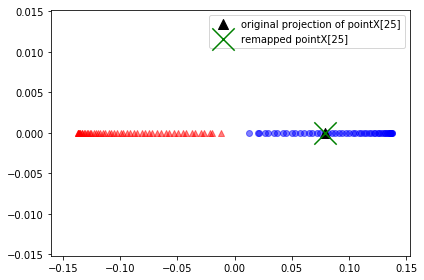

In [81]:
plt.scatter(alphas[y==0,0],np.zeros((50)),color="red",marker="^",alpha=0.5)
plt.scatter(alphas[y==1,0],np.zeros((50)),color="blue",marker="o",alpha=0.5)
plt.scatter(x_proj,0,color="black",label="original projection of pointX[25]",marker="^",s=100)
plt.scatter(x_reproj,0,color="green",label="remapped pointX[25]",marker="x",s=500)
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

In [82]:
from sklearn.decomposition import KernelPCA

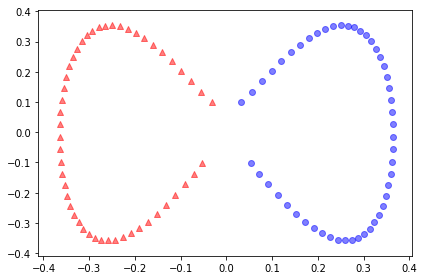

In [84]:
X,y =make_moons(n_samples=100,random_state=123)
scikit_kpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color="red",marker="^",alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color="blue",marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")
plt.tight_layout()
plt.show()